In [1]:

import torch
from torch import nn
import numpy as np
import os
import datetime

from data import *
from config import *
from loader import *
from interpolation import *
from physics import *
from model import *

test_loader = MyLoader([81], shuffle=False, cap_size=CAP_SIZE, path='Datasets/test/', cache=False)

device = torch.device('cuda')

Loading dataset


In [2]:
model = GCN()
model.load_state_dict(torch.load(MODEL_PATH, weights_only=True))
model.to(device)
SU = ScaleUp()

/home/andrew/Desktop/CFD/venv_cfd/lib/python3.11/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [5]:
predictions = []
observations = []

with torch.no_grad():
    for batch in tqdm(test_loader):
        data = batch['instance']
        x = data.x
        out = model(data.to(device))
        y_true = SU(data.y)
        y_pred = SU(out)
        predictions.append(y_pred)
        observations.append(y_true)

# preds = torch.vstack(predictions).to('cpu').numpy()
# obs = torch.vstack(observations).to('cpu').numpy()


100%|██████████| 1/1 [00:07<00:00,  7.43s/it]


In [9]:
pred = predictions[-1].to('cpu').numpy()
obs = observations[-1].to('cpu').numpy()
x = x.to('cpu').numpy()

In [10]:
x.shape

(178437, 9)

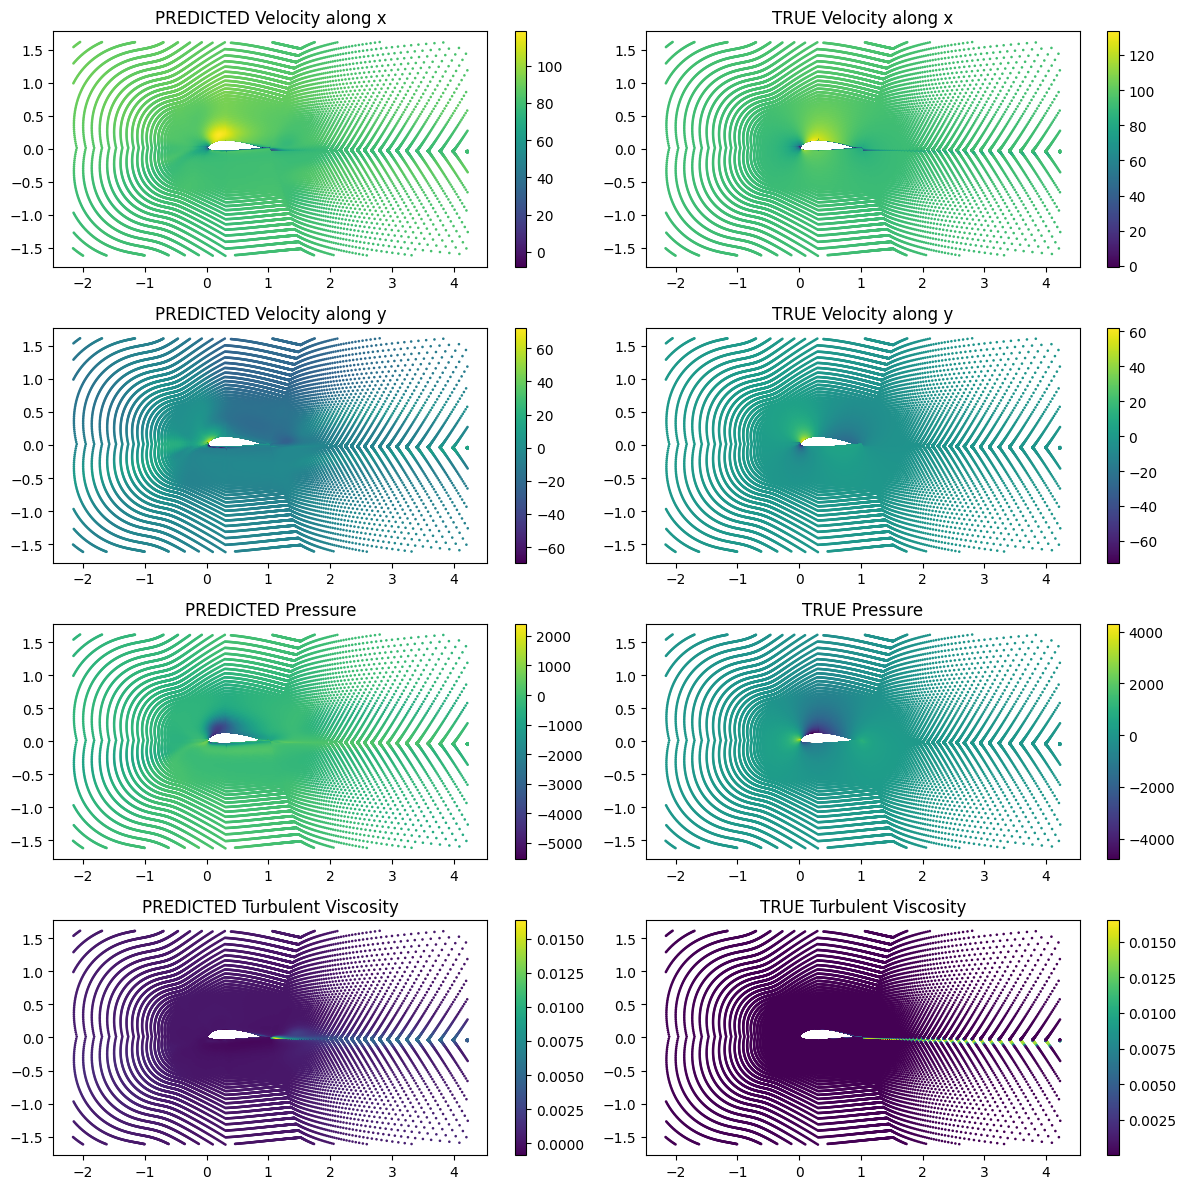

In [11]:
import matplotlib.pyplot as plt

X_VEL = 0
Y_VEL = 1
PRESS = 2
TURB = 3

fig, ax = plt.subplots(4, 2, figsize = (12, 12))
sc0 = ax[0, 0].scatter(x[:,0], x[:,1], c = pred[:, X_VEL], s = 0.75)
ax[0, 0].title.set_text('PREDICTED Velocity along x')
sc1 = ax[0, 1].scatter(x[:,0], x[:,1], c = obs[:, X_VEL], s = 0.75)
ax[0, 1].title.set_text('TRUE Velocity along x')
plt.colorbar(sc0)
plt.colorbar(sc1)

sc2 = ax[1, 0].scatter(x[:,0], x[:,1], c = pred[:, Y_VEL], s = 0.75)
ax[1, 0].title.set_text('PREDICTED Velocity along y')
sc3 = ax[1, 1].scatter(x[:,0], x[:,1], c = obs[:, Y_VEL], s = 0.75)
ax[1, 1].title.set_text('TRUE Velocity along y')
plt.colorbar(sc2)
plt.colorbar(sc3)

sc4 = ax[2, 0].scatter(x[:,0], x[:,1], c = pred[:, PRESS], s = 0.75)
ax[2, 0].title.set_text('PREDICTED Pressure')
sc5 = ax[2, 1].scatter(x[:,0], x[:,1], c = obs[:, PRESS], s = 0.75)
ax[2, 1].title.set_text('TRUE Pressure')
plt.colorbar(sc4)
plt.colorbar(sc5)

sc6 = ax[3, 0].scatter(x[:,0], x[:,1], c = pred[:, TURB], s = 0.75)
ax[3, 0].title.set_text('PREDICTED Turbulent Viscosity')
sc7 = ax[3, 1].scatter(x[:,0], x[:,1], c = obs[:, TURB], s = 0.75)
ax[3, 1].title.set_text('TRUE Turbulent Viscosity')
plt.colorbar(sc6)
plt.colorbar(sc7)

# sc2 = ax[1, 0].scatter(x[:,0], x[:,1], c = pred[:, Y_VEL], s = 0.75)
# ax[1, 0].title.set_text('Velocity along y')
# plt.colorbar(sc2)

# sc1 = ax[2, 0].scatter(x[:,0], x[:,1], c = pred[:, PRESS], s = 0.75)
# ax[2, 0].title.set_text('Pressure')
# plt.colorbar(sc1)

# sc3 = ax[3, 0].scatter(x[:,0], x[:,1], c = pred[:, TURB], s = 0.75)
# ax[3, 0].title.set_text('Kinematic turbulent viscosity')
# plt.colorbar(sc3)

fig.tight_layout()
plt.show()

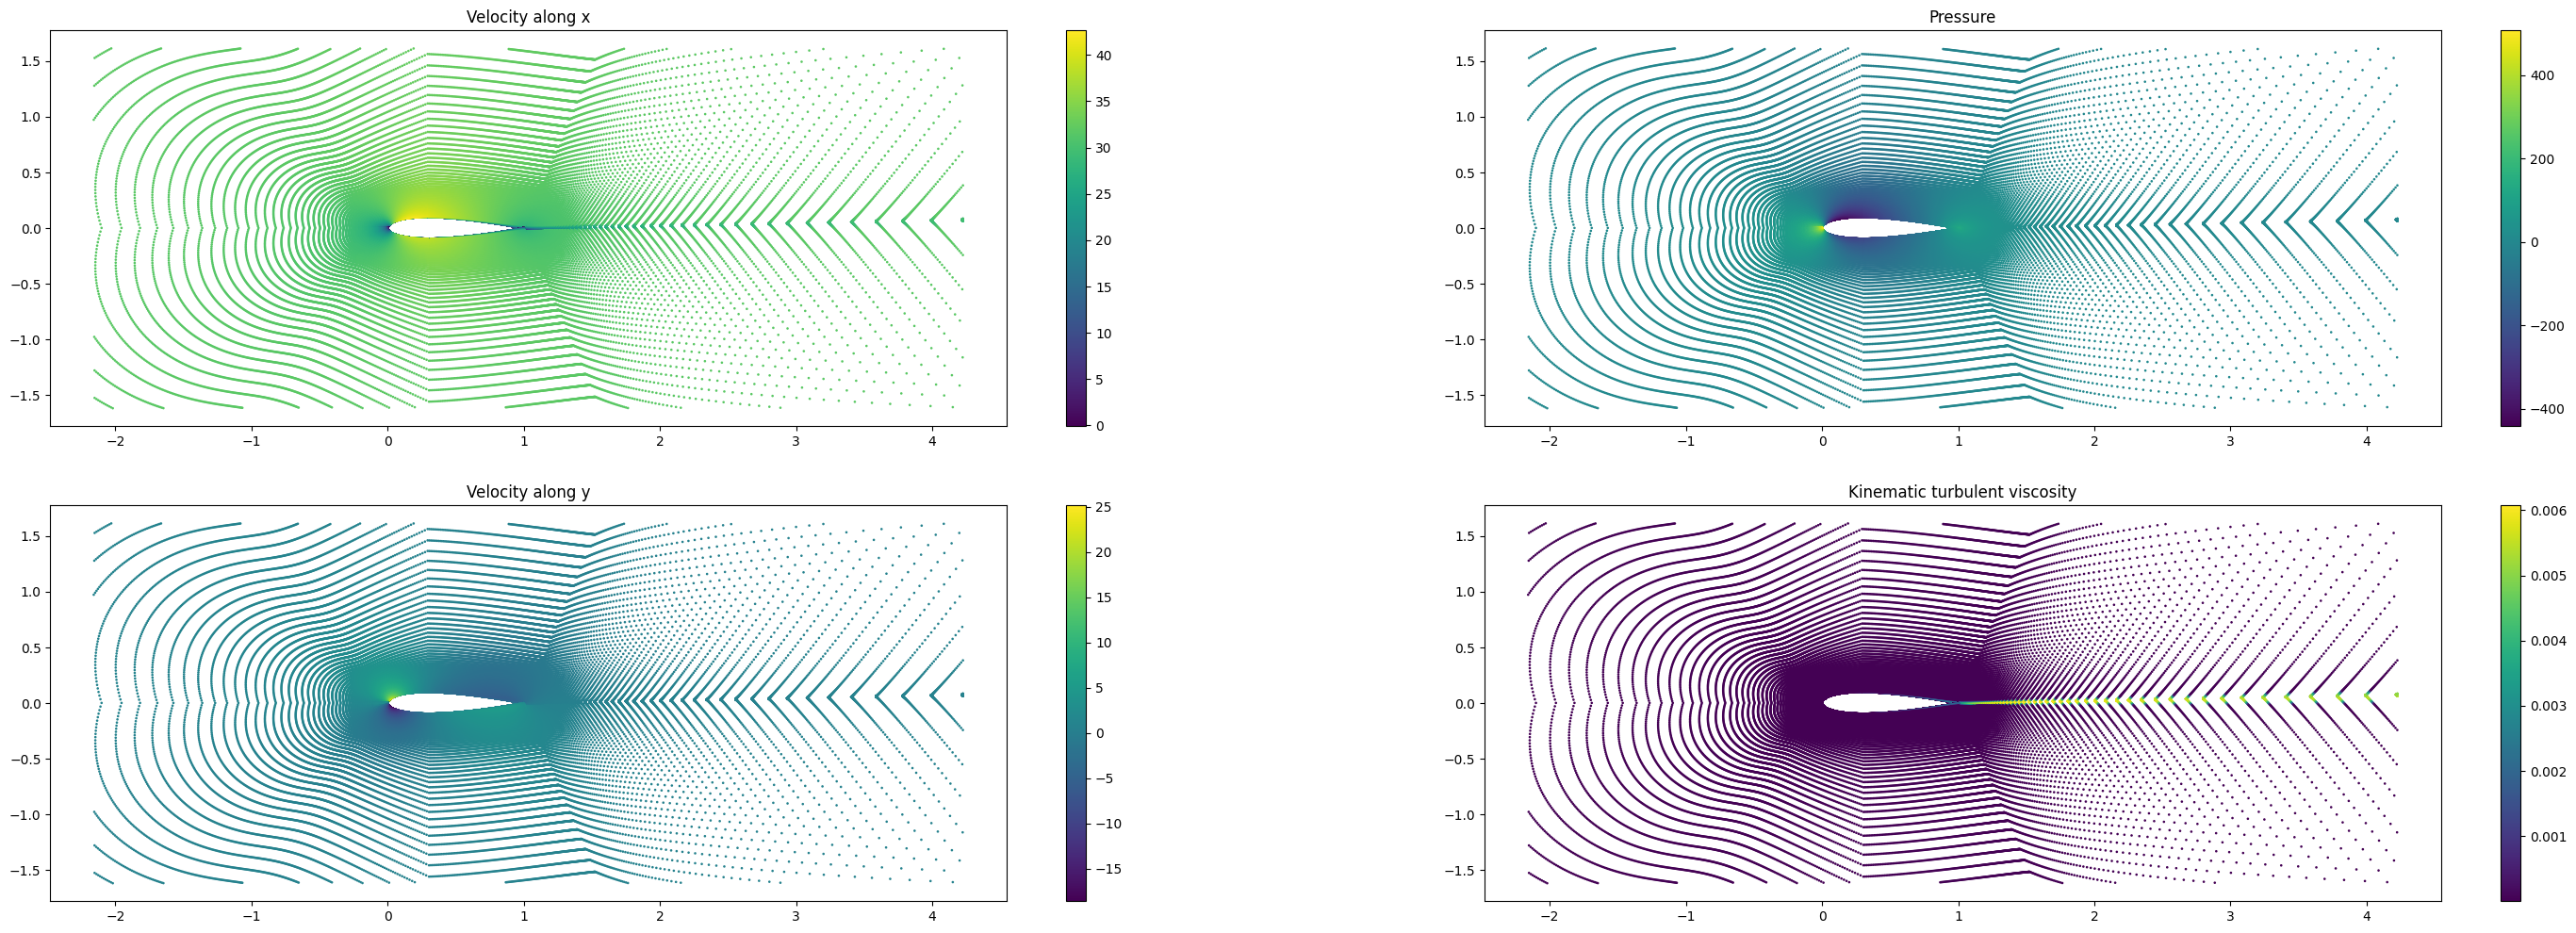

In [20]:
fig, ax = plt.subplots(2, 2, figsize = (36, 12))
sc0 = ax[0, 0].scatter(x[:,0], x[:,1], c = obs[:, X_VEL], s = 0.75)
ax[0, 0].title.set_text('Velocity along x')
plt.colorbar(sc0)
sc1 = ax[0, 1].scatter(x[:,0], x[:,1], c = obs[:, PRESS], s = 0.75)
ax[0, 1].title.set_text('Pressure')
plt.colorbar(sc1)
sc2 = ax[1, 0].scatter(x[:,0], x[:,1], c = obs[:, Y_VEL], s = 0.75)
ax[1, 0].title.set_text('Velocity along y')
plt.colorbar(sc2)
sc3 = ax[1, 1].scatter(x[:,0], x[:,1], c = obs[:, TURB], s = 0.75)
ax[1, 1].title.set_text('Kinematic turbulent viscosity')
plt.colorbar(sc3)
plt.show()